# Data Cleaning and Normalization

**Definition**


*   **Data Cleaning**: Data Cleaning involves identifying and correcting (or removing) errors or inconsistencies in the data to improve its quality. Common tasks include handling missing values, removing duplicates, correcting errors, and ensure consistency in data.
*   **Normalization**: Normalization is the process of scaling numerical data to a standard range, typically between 0 and 1, or transforming it to have a mean of 0 and a standard deviation of 1. This process helps improve the performance of machine learning algorithms and ensures that all features contribute equally to the result.

**Use Case in Real Life**:

*   **Preparing Data for Machine Learning**: Handle missing values and remove duplicates to ensure clean data. Normalize features to improve the performance of machine learning algorithms.
*   **Financial Data Analysis**: Correct errors in transaction data and fill missing values. Normalize financial metrics for comparison across different scales.
* **Customer Data Engagement**: Ensure consistency in customer records and correct erroneous entries. Normalize customer age and income data for segmentation analysis.




# Loading the Dataset

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_excel("Sample_data.xlsx")
print(df)

      Name   Age  Salary    Department
0    Alice  25.0  50000.0           HR
1      Bob  30.0      NaN  Engineering
2  Charlie  35.0  70000.0  Engineering
3    David   NaN  60000.0           HR
4      Eve  28.0  80000.0           HR
5    Frank  40.0  55000.0        Sales
6    Grace  50.0  85000.0        Sales
7     Hank  60.0  90000.0        Sales


# Identifying Missing Values

In [9]:
# Check for missing values
print(df.isnull().sum())

Name          0
Age           1
Salary        1
Department    0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        8 non-null      object 
 1   Age         7 non-null      float64
 2   Salary      7 non-null      float64
 3   Department  8 non-null      object 
dtypes: float64(2), object(2)
memory usage: 384.0+ bytes


# Removing rows with missing values

In [17]:
# removing rows with missing values
df_cleaned = df.dropna()
print(df_cleaned)

      Name   Age  Salary    Department
0    Alice  25.0  50000.0           HR
2  Charlie  35.0  70000.0  Engineering
4      Eve  28.0  80000.0           HR
5    Frank  40.0  55000.0        Sales
6    Grace  50.0  85000.0        Sales
7     Hank  60.0  90000.0        Sales


# Filling Missing Values

In [21]:
# Fill missing values with a specific value
df_filled = df.fillna({
    'Age' : df['Age'].mean(),
    'Salary': df['Salary '].mean()
})
print(df_filled)

      Name        Age  Salary    Department
0    Alice  25.000000  50000.0           HR
1      Bob  30.000000      NaN  Engineering
2  Charlie  35.000000  70000.0  Engineering
3    David  38.285714  60000.0           HR
4      Eve  28.000000  80000.0           HR
5    Frank  40.000000  55000.0        Sales
6    Grace  50.000000  85000.0        Sales
7     Hank  60.000000  90000.0        Sales


# Forward Fill Method

In [22]:
# Forward Fill Method to propagate the next values backward
df_ffill = df.fillna(method='ffill')
print(df_ffill)

      Name   Age  Salary    Department
0    Alice  25.0  50000.0           HR
1      Bob  30.0  50000.0  Engineering
2  Charlie  35.0  70000.0  Engineering
3    David  35.0  60000.0           HR
4      Eve  28.0  80000.0           HR
5    Frank  40.0  55000.0        Sales
6    Grace  50.0  85000.0        Sales
7     Hank  60.0  90000.0        Sales


# Backward Fill Method

In [23]:
# Backward Fill Method to propagate the next values forward
df_bfill = df.fillna(method='bfill')
print(df_bfill)

      Name   Age  Salary    Department
0    Alice  25.0  50000.0           HR
1      Bob  30.0  70000.0  Engineering
2  Charlie  35.0  70000.0  Engineering
3    David  28.0  60000.0           HR
4      Eve  28.0  80000.0           HR
5    Frank  40.0  55000.0        Sales
6    Grace  50.0  85000.0        Sales
7     Hank  60.0  90000.0        Sales


# Removing Duplicates

In [24]:
# Add duplicate rows for demonstartion
df = pd.concat([df, df.iloc[[0]], df.iloc[[1]]], ignore_index = True)
print("Before removing duplicates:\n", df)

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()
print("After removing duplicates:\n", df_no_duplicates)

Before removing duplicates:
       Name   Age  Salary    Department
0    Alice  25.0  50000.0           HR
1      Bob  30.0      NaN  Engineering
2  Charlie  35.0  70000.0  Engineering
3    David   NaN  60000.0           HR
4      Eve  28.0  80000.0           HR
5    Frank  40.0  55000.0        Sales
6    Grace  50.0  85000.0        Sales
7     Hank  60.0  90000.0        Sales
8    Alice  25.0  50000.0           HR
9      Bob  30.0      NaN  Engineering
After removing duplicates:
       Name   Age  Salary    Department
0    Alice  25.0  50000.0           HR
1      Bob  30.0      NaN  Engineering
2  Charlie  35.0  70000.0  Engineering
3    David   NaN  60000.0           HR
4      Eve  28.0  80000.0           HR
5    Frank  40.0  55000.0        Sales
6    Grace  50.0  85000.0        Sales
7     Hank  60.0  90000.0        Sales


# Replacing Incorrect Values

In [25]:
# Replace incorrect values in the 'Department' column
df_corrected = df.replace({
    'Department' : {'HR' : 'Human Resources', 'Sales' : 'Sales Department'}
})
print(df_corrected)

      Name   Age  Salary         Department
0    Alice  25.0  50000.0   Human Resources
1      Bob  30.0      NaN       Engineering
2  Charlie  35.0  70000.0       Engineering
3    David   NaN  60000.0   Human Resources
4      Eve  28.0  80000.0   Human Resources
5    Frank  40.0  55000.0  Sales Department
6    Grace  50.0  85000.0  Sales Department
7     Hank  60.0  90000.0  Sales Department
8    Alice  25.0  50000.0   Human Resources
9      Bob  30.0      NaN       Engineering


# Ensuring Consistency

In [27]:
# Convert all department names to lowercase for consistency
df['Department'] = df['Department'].str.lower()
print(df)

      Name   Age  Salary    Department
0    Alice  25.0  50000.0           hr
1      Bob  30.0      NaN  engineering
2  Charlie  35.0  70000.0  engineering
3    David   NaN  60000.0           hr
4      Eve  28.0  80000.0           hr
5    Frank  40.0  55000.0        sales
6    Grace  50.0  85000.0        sales
7     Hank  60.0  90000.0        sales
8    Alice  25.0  50000.0           hr
9      Bob  30.0      NaN  engineering


# Min Max Normalization

**Definition**-

*   Min-Max Normalization is a technique to rescale the values of a feature to a fixed range, usually [0,1]
*   This is done by transforming each value in the feature such that it fits within the specified range.

**Formula**:



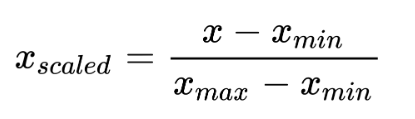

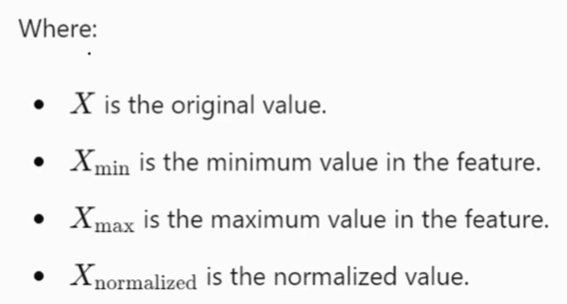

In [28]:
# Apply Min-Max Normalization using the formula
df_normalized = df.copy()
for col in ['Age', 'Salary ']:
  df_normalized[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Print original and normalized values
print("Original Values:")
print(df)
print("\nNormalized Values:")
print(df_normalized)

Original Values:
      Name   Age  Salary    Department
0    Alice  25.0  50000.0           hr
1      Bob  30.0      NaN  engineering
2  Charlie  35.0  70000.0  engineering
3    David   NaN  60000.0           hr
4      Eve  28.0  80000.0           hr
5    Frank  40.0  55000.0        sales
6    Grace  50.0  85000.0        sales
7     Hank  60.0  90000.0        sales
8    Alice  25.0  50000.0           hr
9      Bob  30.0      NaN  engineering

Normalized Values:
      Name       Age  Salary    Department
0    Alice  0.000000    0.000           hr
1      Bob  0.142857      NaN  engineering
2  Charlie  0.285714    0.500  engineering
3    David       NaN    0.250           hr
4      Eve  0.085714    0.750           hr
5    Frank  0.428571    0.125        sales
6    Grace  0.714286    0.875        sales
7     Hank  1.000000    1.000        sales
8    Alice  0.000000    0.000           hr
9      Bob  0.142857      NaN  engineering


Advantages:


*   Ensures that features contribute equally to the analysis.
*   Helps improve the performance of machine learning algorithms.
*   Simplifies the interpretation of coefficients in linear modules.

Disadvantages:
*   Sensitive to outliers, as the range is determined by the minimum and maximum values.
*   Not suitable for data with a non linear distribution, as it can distort the original data distribution.



